##Problem - 1: Perform a classification task with knn from scratch.

**1. Load the Dataset:**

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [2]:
import pandas as pd

In [4]:
#Reading the data into a pandas dataframe
df=pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Displaying the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis (EDA) :

In [6]:
#Checking the data types of each column
column_datatype=df.dtypes
print(column_datatype)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
#Checking if there are missing values
missing_values=df.isnull().sum()
print("Number of missing values in each column=\n",missing_values)

Number of missing values in each column=
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#Displaying the summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2. Handle Missing Data:**

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [9]:
#Filling the null values using forward fill
forward_fill=df.ffill()
print(forward_fill)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

**3. Feature Engineering:**

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [10]:
import numpy as np

In [11]:
#Dropping the outcome column for x
feature_x=df.drop('Outcome',axis=1)
#Adding only outcome column in y
target_y=df['Outcome']

In [1]:
print(feature_x)
print(target_y)

NameError: name 'feature_x' is not defined

In [12]:
#Converting features to numpy array
feature_matrix_x=np.array(feature_x.values)
#Converting the target to numpy array
target_variable_y=np.array(target_y)
print(feature_matrix_x)
print(target_variable_y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [13]:
def train_test_split(X,y,test_size=0.3,random_seed=42):
  #setting a random seed
  np.random.seed(random_seed)

  #Generating an array of indices corresponding to the rows of X
  indices=np.arange(X.shape[0])

  #shuffling those indices
  np.random.shuffle(indices)

  #determining the number of samples in the test set as a proportion of the total dataset size
  test_split_size=int(test_size*len(indices))

  #Taking the first test_split_size
  test_indices=indices[:test_split_size]

  #Taking the remaining elements, starting from test_split_size to the end
  train_indices=indices[test_split_size:]

  #Using the indices to split x and y
  X_train,X_test=X[train_indices],X[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test

#Performing the train-test split
X_train,X_test,y_train,y_test=train_test_split(feature_matrix_x,target_variable_y,test_size=0.3)


In [16]:
#Printing shapes to verify
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print(y_train)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)
[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 

**4. Implement KNN:**

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [ ]:
#Declare a function to compute distances using Euclidean distance
def euclidean_distance(point1, point2):
  '''
  Calculate the Euclidean distance between two points in n-dimensional space.
  Arguments:
  point1 : np.ndarray
  The first point as a numpy array.
  point2 : np.ndarray
  The second point as a numpy array.
  Returns:
  float
  The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  '''
  #Check if the points are of same dimension
  if point1.shape != point2.shape:
    raise ValueError("Input points must have the same dimensionality")
  #Calculate the distance between them (euclidean distance)
  distance = np.sqrt(np.sum((point1 - point2)**2))
  return distance

In [ ]:
#Declare a function to predict class for a single query
def knn_predict_single(query,X_train,y_train,k):
  '''
  Predict the class label for a single query using the K-Nearest Neighbors algorithm.
  Arguments:
  query: np.ndarray
      The query point for which the prediction is to be made.
  X_train: np.ndarray
      The training feature matrix
  y_train: np.ndarray
      The training labels.
  k: int, optional
      The number of nearest neighbors to consider for prediction. (default is 3)
  Returns:
  prediction (int):
      The predicted class label for the query point.
  '''

  #calculate the distance from query to all training points
  distances= [euclidean_distance(query,x) for x in X_train]

  #Sorting the elements of the array and returning its indices
  sorted_indices=np.argsort(distances)

  #Get indices of k nearest neighbours
  nearest_indices=sorted_indices[:k]

  #Get the corresponding labels of the nearest neighbors
  nearest_labels=[y_train[i] for i in nearest_indices]

  #Count occurences of each label
  count=np.bincount(nearest_labels)

  #Get the label with maximum count
  prediction=np.argmax(count)

  return prediction


In [ ]:
#Declare a function to predict classes for all test samples.
def knn_predict(X_test, X_train, y_train, k):
  '''
  Predict the class labels for all test samples using the K-Nearest Neighbors algorithm.
  Arguments:
  X_test: np.ndarray
      The test feature matrix.
  X_train: np.ndarray
      The training feature matrix.
  y_train: np.ndarray
      The training labels.
  k: int, optional
      The number of nearest neighbors to consider for prediction. (default is 3)
  Returns:
  predictions: np.ndarray
      An array of predicted class labels for the test samples.
  '''
  #Calling the knn_predict_single function for each test point x
  predictions=[knn_predict_single(x,X_train,y_train,k) for x in X_test]
  return np.array(predictions)

In [ ]:
#Declare a function to compute accuracy
def compute_accuracy(y_true,y_pred):
  '''
  Compute the accuracy of a classification model.
  Arguments:
  y_true: np.ndarray
      The true class labels.
  y_pred: np.ndarray
      The predicted class labels.
  Returns:
  float: The accuracy as a percentage
  '''
  #Count the number of true values in a boolean array which corresponds to the number of true predictions
  correct_predictions=np.sum(y_true==y_pred)

  #Getting the total number of predictions
  total_predictions=len(y_true)

  accuracy=(correct_predictions/total_predictions)*100
  return accuracy

In [ ]:
#Perform prediction on the entire test set
try:
  #Make predictions on the entire test set
  predictions=knn_predict(X_test, X_train, y_train, k=3)

  #Compute the accuracy
  accuracy=compute_accuracy(y_test,predictions)

  #Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexprected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


##Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.
2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [ ]:
#For training data
#find minimum value along each feature
X_min_train = X_train.min(axis=0)

#find maximum value along each feature
X_max_train = X_train.max(axis=0)

#manually scaling data using
X_train_scaled = (X_train - X_min_train) / (X_max_train - X_min_train)

#printing the scaled data
print(X_train_scaled)

[[0.29411765 0.38693467 0.67213115 ... 0.53353204 0.03330487 0.23333333]
 [0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]


In [ ]:
#For testing data
#find minimum value along each feature
X_min_test = X_test.min(axis=0)

#find maximum value along each feature
X_max_test = X_test.max(axis=0)

#manually scaling data using
X_test_scaled = (X_test - X_min_test) / (X_max_test - X_min_test)

#printing the scaled data
print(X_test_scaled)

[[0.46153846 0.27205882 0.50877193 ... 0.59336824 0.22619048 0.47826087]
 [0.15384615 0.375      0.65789474 ... 0.62303665 0.03968254 0.        ]
 [0.15384615 0.34558824 0.56140351 ... 0.53752182 0.0462963  0.        ]
 ...
 [0.30769231 0.35294118 0.56140351 ... 0.60732984 0.54034392 0.10869565]
 [0.         0.48529412 0.70175439 ... 0.63350785 0.47354497 0.04347826]
 [0.46153846 0.32352941 0.61403509 ... 0.53752182 0.02248677 0.34782609]]


In [ ]:
#Perform prediction on the entire test set
try:
  #Make predictions on the entire scaled test set
  predictions=knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)

  #Compute the accuracy
  accuracy=compute_accuracy(y_test,predictions)

  #Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexprected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 70.87%


- > Before scaling, the features have different scales for example one scale might be in a range of 0-1 whereas another scale might be in a range of 0-1000. Therefore, in this case, the larger scale features dominate the distance calculation. After scaling the data, all the features are brought to a same range which makes the distance calculation more balanced. This leads to a better accuracy because the model treats all the features equally, and the predictions are more reliable.

##Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [ ]:
import matplotlib.pyplot as plt
from timeit import timeit

In [ ]:
#Accuracy of original dataset
accuracies_original={}

#Iterating over each value of k in k_values
for k in range(1,16):
  #Make predictions using the current value of k
  predictions=knn_predict(X_test, X_train, y_train,k=k)

  #Compute accuracy
  accuracy=compute_accuracy(y_test,predictions)

  #Store the accuracy in the dictionary as key and value pair
  accuracies_original[k]=accuracy

  print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 68.70
Accuracy for k=2: 72.61
Accuracy for k=3: 67.39
Accuracy for k=4: 72.17
Accuracy for k=5: 68.70
Accuracy for k=6: 70.00
Accuracy for k=7: 69.13
Accuracy for k=8: 71.30
Accuracy for k=9: 70.00
Accuracy for k=10: 71.74
Accuracy for k=11: 73.04
Accuracy for k=12: 73.91
Accuracy for k=13: 74.35
Accuracy for k=14: 72.61
Accuracy for k=15: 73.91


In [ ]:
#Accuracy of scaled dataset
accuracies_scaled={}

#Iterating over each value of k in k_values
for k in range(1,16):
  #Make predictions using the current value of k
  predictions=knn_predict(X_test_scaled, X_train_scaled, y_train,k=k)

  #Compute accuracy
  accuracy=compute_accuracy(y_test,predictions)

  #Store the accuracy in the dictionary as key and value pair
  accuracies_scaled[k]=accuracy

  print(f"Accuracy for k={k}: {accuracy:.2f}")


Accuracy for k=1: 70.00
Accuracy for k=2: 70.43
Accuracy for k=3: 70.87
Accuracy for k=4: 71.74
Accuracy for k=5: 71.74
Accuracy for k=6: 73.48
Accuracy for k=7: 71.74
Accuracy for k=8: 74.35
Accuracy for k=9: 74.35
Accuracy for k=10: 74.35
Accuracy for k=11: 74.78
Accuracy for k=12: 73.04
Accuracy for k=13: 74.78
Accuracy for k=14: 74.78
Accuracy for k=15: 76.09


In [ ]:
from timeit import timeit


In [ ]:
#Time taken for original dataset
time_original=[]
# Loop over the values of k
for k in range(1, 16):
    # Create the statement string to time the function
    stmt = f"knn_predict(X_test, X_train, y_train, k={k})"

    # Time the knn_predict function with the current k value
    time_taken = timeit(stmt, globals=globals(), number=5)
    time_original.append(time_taken)

    # Print the time taken for each k
    print(f"Time taken for k={k}: {time_taken:.6f} seconds")


Time taken for k=1: 4.127189 seconds
Time taken for k=2: 5.891742 seconds
Time taken for k=3: 4.118519 seconds
Time taken for k=4: 4.089988 seconds
Time taken for k=5: 6.875434 seconds
Time taken for k=6: 5.948060 seconds
Time taken for k=7: 4.927896 seconds
Time taken for k=8: 5.637722 seconds
Time taken for k=9: 4.298558 seconds
Time taken for k=10: 5.548445 seconds
Time taken for k=11: 5.289892 seconds
Time taken for k=12: 4.589889 seconds
Time taken for k=13: 5.668999 seconds
Time taken for k=14: 4.278287 seconds
Time taken for k=15: 4.292443 seconds


In [ ]:
#Time taken for scaled dataset
time_scaled=[]
# Loop over the values of k
for k in range(1, 16):
    # Create the statement string to time the function
    stmt = f"knn_predict(X_test_scaled, X_train_scaled, y_train, k={k})"

    # Time the knn_predict function with the current k value
    time_taken = timeit(stmt, globals=globals(), number=5)
    time_scaled.append(time_taken)

    # Print the time taken for each k
    print(f"Time taken for k={k}: {time_taken:.6f} seconds")


Time taken for k=1: 5.027631 seconds
Time taken for k=2: 5.475105 seconds
Time taken for k=3: 4.875049 seconds
Time taken for k=4: 6.691748 seconds
Time taken for k=5: 4.924862 seconds
Time taken for k=6: 4.151760 seconds
Time taken for k=7: 6.628659 seconds
Time taken for k=8: 6.105788 seconds
Time taken for k=9: 6.427917 seconds
Time taken for k=10: 4.544845 seconds
Time taken for k=11: 4.452993 seconds
Time taken for k=12: 6.861385 seconds
Time taken for k=13: 4.469244 seconds
Time taken for k=14: 4.232683 seconds
Time taken for k=15: 6.348384 seconds


2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

In [ ]:
#define the range of k values to experiment with
k_values=range(1,16)


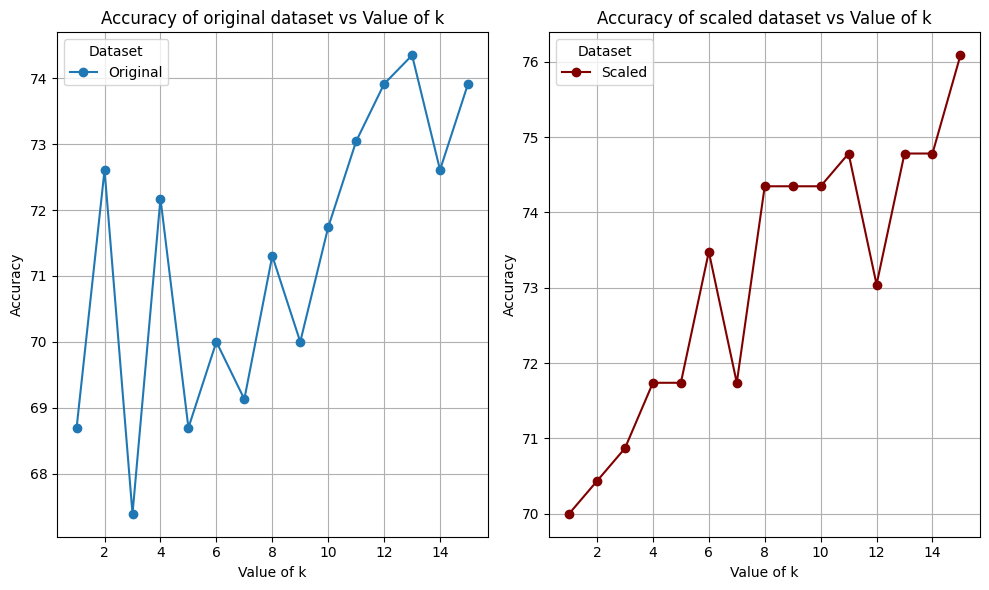

In [ ]:

#Plotting line charts
plt.figure(figsize=(10,6))

#For accuracy of original dataset vs value of k
plt.subplot(1,2,1)
plt.plot(k_values,list(accuracies_original.values()),marker='o',label="Original")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of original dataset vs Value of k')
plt.grid(True)
plt.legend(title="Dataset")

#For accuracy of scaled dataset vs value of k
plt.subplot(1,2,2)
plt.plot(k_values,list(accuracies_scaled.values()),marker='o',color="maroon",label="Scaled")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of scaled dataset vs Value of k')
plt.grid(True)
plt.legend(title="Dataset")

plt.tight_layout()
plt.show()

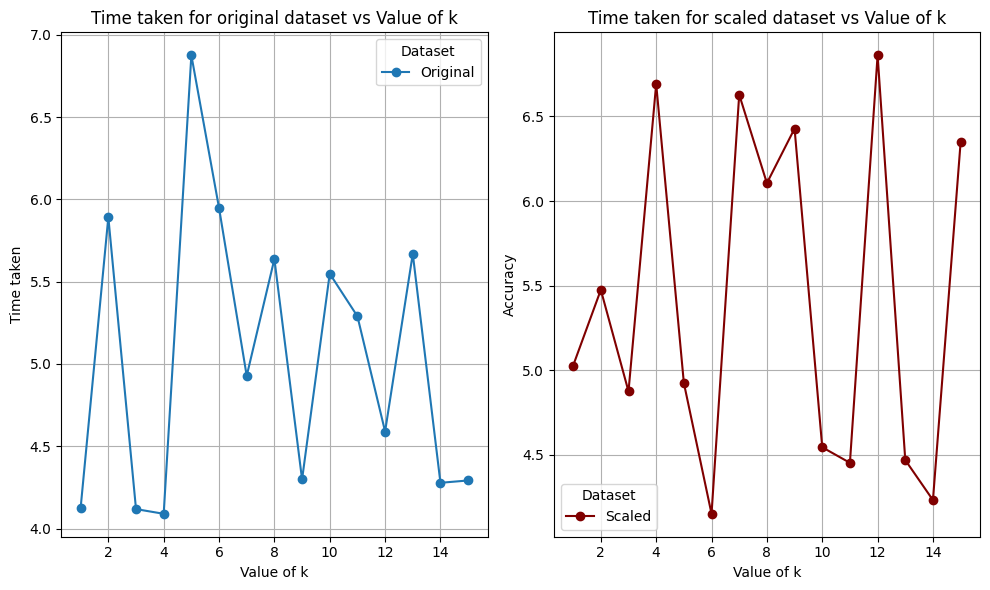

In [ ]:
#Plotting line charts
plt.figure(figsize=(10,6))

#For time taken for original dataset vs value of k
plt.subplot(1,2,1)
plt.plot(k_values,time_original,marker='o',label="Original")
plt.xlabel('Value of k')
plt.ylabel('Time taken')
plt.title('Time taken for original dataset vs Value of k')
plt.grid(True)
plt.legend(title="Dataset")

#For time taken for scaled dataset vs value of k
plt.subplot(1,2,2)
plt.plot(k_values,time_scaled,marker='o',color="maroon",label="Scaled")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Time taken for scaled dataset vs Value of k')
plt.grid(True)
plt.legend(title="Dataset")

plt.tight_layout()
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

- > Choice of k affecting accuracy:

    For small value of k, the model may overfit because there will be high bias  which leads to high accuracy on training data and low accuracy on testing data but less variance whereas for high value of k, the model may underfit because there will be less bias but high variance which leads to less accuracy on training data and high accuracy on testing data.

- > Choice of k affecting computational cost:

    For small value of k, there will be faster predictions as only few neighbours are considered due to which computational cost will be low whereas for high value of k, there will be slower predictions as many neighbours are considered so computationsl cost will be high.

- > Optimal value of k:

    If the value of k balances in accuracy and computational cost that value of k is considered to be optimal.

Observing the graphs for accuracy and time taken for prediction of k for original data, k = 13 has the highest accuracy of 74.35% so it can be taken as an optimal value.

Observing the graphs for accuracy and time taken for prediction of k for scaled data, k = 15 has the highest accuracy of 76.09% so it can be taken as an optimal value.



